# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement
In 2-4 sentences, explain the kind of problem you want to look at and the datasets you will be wrangling for this project.

Through the following project we want to identify the following: 1. For Xbox One games, who are the websites and publishers with the most games published and which developers have made the most games? And 2. Of the series on Netflix, which are the countries that have produced the most shows and who are the directors with the largest number of series produced on Netflix?

### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Programmatically downloading files
- Gather data by accessing APIs
- Gather and extract data from HTML files using BeautifulSoup
- Extract data from a SQL database

Each dataset must have at least two variables, and have greater than 500 data samples within each dataset.

For each dataset, briefly describe why you picked the dataset and the gathering method (2-3 full sentences), including the names and significance of the variables in the dataset. Show your work (e.g., if using an API to download the data, please include a snippet of your code). 

Load the dataset programmtically into this notebook.

#### **Dataset 1**

Type: Kaggle Dataset

Method: The data was gathered using the "API" method from Kaggle source.

Dataset variables:

*   *Variable 1 : gameid - unique id for each game
*   *Variable 2 : web - website that published the game
*   *Variable 3 : publisher - publisher that published the game
*   *Variable 4 : developed - developer that developed the game

In [1]:
#FILL IN 1st data gathering and loading method

import os
import pandas as pd
from kaggle.api.kaggle_api_extended import KaggleApi

# Set the path for the kaggle.json file
os.environ['KAGGLE_CONFIG_DIR'] = 'C:/Users/nicol/.kaggle'

# Authenticate with the Kaggle API
api = KaggleApi()
api.authenticate()

# Download the dataset
api.dataset_download_files('shivamb/all-xbox-one-games', path='./', unzip=True)

# Assume the downloaded file is a CSV
xbox = pd.read_csv('C:/Users/nicol/Downloads/xbox_one_games.csv')

# Display the first rows of the dataframe
print(xbox.head()) #IMPORTANT

print(xbox.describe()) #IMPORTANT

   gameid                                          name  \
0    5530                                             Q   
1    5819  Q*bert REBOOTED: The XBOX One @!#?@! Edition   
2    6951                                    Q.U.B.E. 2   
3    5561                       Q.U.B.E. Director's Cut   
4    9781                                         Quake   

                                       web            publisher  \
0  http://liica.co.jp/contents/q/jp/x.html                liica   
1                                      NaN                  GPC   
2      https://www.toxicgames.co.uk/qube2/  Trapped Nerve Games   
3                    http://qube-game.com/         GRIP Digital   
4                                      NaN   Bethesda Softworks   

                                      developer           release  \
0                              liica, OrangeBox      26 June 2015   
1                              LOOT Interactive  12 February 2016   
2                                  

#### Dataset 2

Type: CSV File

Method: The data was gathered using the "Downloading files" method from X source.

Dataset variables:

*   *Variable 1 : show_id - unique id for each show
*   *Variable 2 : director - director who directed the show
*   *Variable 3 : country - country where the show was produced

In [2]:
#FILL IN 2nd data gathering and loading method

import pandas as pd

def load_csv(path):
    try:
        # Load the CSV file into a DataFrame with UTF-8 encoding
        df = pd.read_csv(path, encoding="utf-8")
        return df
    except FileNotFoundError:
        print(f"The file at path {path} was not found.")
        return None

# Path to the CSV file
file_path = r'C:\Users\nicol\Downloads\netflix_titles.csv'

# Call the function to load the file
netflix= load_csv(file_path)

print(netflix.head()) #IMPORTANT
print(netflix.describe()) #IMPORTANT

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

Optional data storing step: You may save your raw dataset files to the local data store before moving to the next step.

In [3]:
#Optional: store the raw data in your local data store

## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### Quality Issue 1:

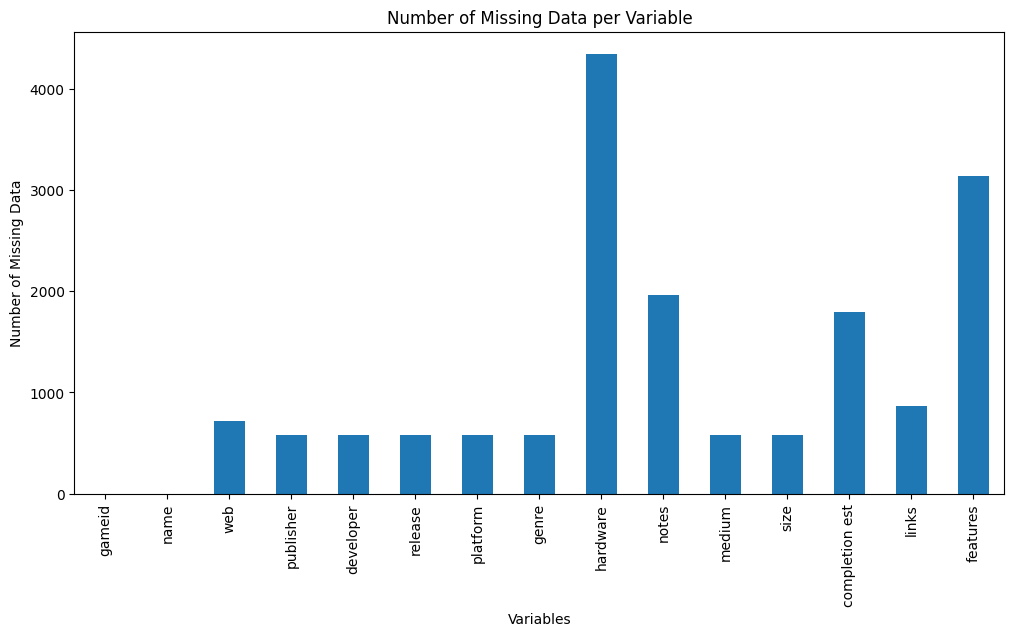

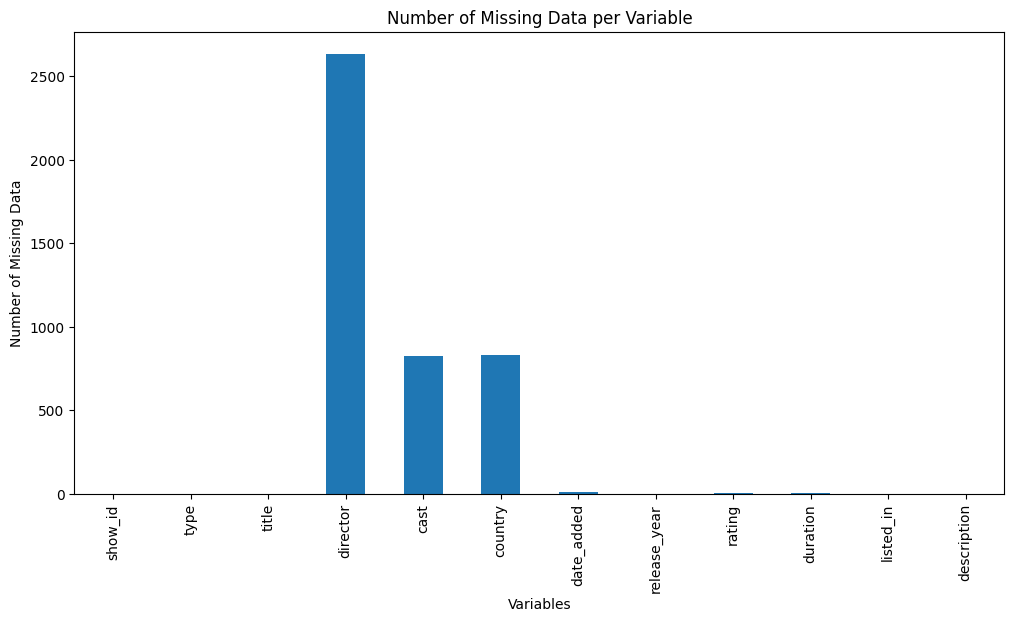

In [4]:
#data quality issue: variables with null data: The idea is to find which variables have the greatest amount of null data to exclude these records if necessary. - Inspecting the dataframe visually

import pandas as pd
import matplotlib.pyplot as plt

def plot_missing_data(dataset):
    # Calculate the number of missing values per variable
    missing_data = dataset.isnull().sum()
    
    # Create a bar chart to display the missing values
    plt.figure(figsize=(12, 6))
    missing_data.plot(kind='bar')
    
    # Set the title and axis labels
    plt.title("Number of Missing Data per Variable")
    plt.xlabel("Variables")
    plt.ylabel("Number of Missing Data")
    
    # Show the chart
    plt.show()

plot_missing_data(xbox)
plot_missing_data(netflix)

In [5]:
# data quality issue: variables with null data - Inspecting the dataframe programmatically

import pandas as pd

def null_data_summary(dataframe):
    # Calculate the number of null values per variable
    nulls_per_variable = dataframe.isnull().sum()

    # Calculate the percentage of null data per variable
    null_percentage = (nulls_per_variable / len(dataframe)) * 100

    # Create a DataFrame to display the summary
    summary = pd.DataFrame({'Nulls': nulls_per_variable, 'Null Percentage': null_percentage})
    
    return summary

print(null_data_summary(xbox))
print("\n")
print(null_data_summary(netflix))



                Nulls  Null Percentage
gameid              0         0.000000
name                0         0.000000
web               714        14.856429
publisher         583        12.130670
developer         582        12.109863
release           580        12.068248
platform          580        12.068248
genre             583        12.130670
hardware         4345        90.407824
notes            1966        40.907199
medium            580        12.068248
size              581        12.089055
completion est   1791        37.265918
links             862        17.935913
features         3140        65.334998


              Nulls  Null Percentage
show_id           0         0.000000
type              0         0.000000
title             0         0.000000
director       2634        29.908028
cast            825         9.367549
country         831         9.435676
date_added       10         0.113546
release_year      0         0.000000
rating            4         0.045418
dura

Issue and justification: data quality issue: variables with null data: The idea is to find which variables have the greatest amount of null data to exclude these records if necessary. This is because it can generate noise in the analysis and there is data that cannot be grouped in the variable if it has null data.

### Quality Issue 2:

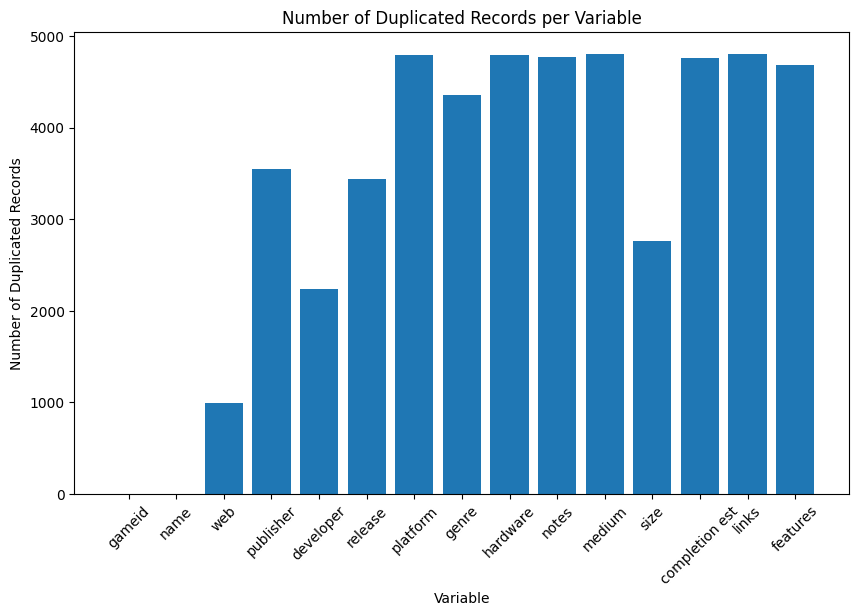

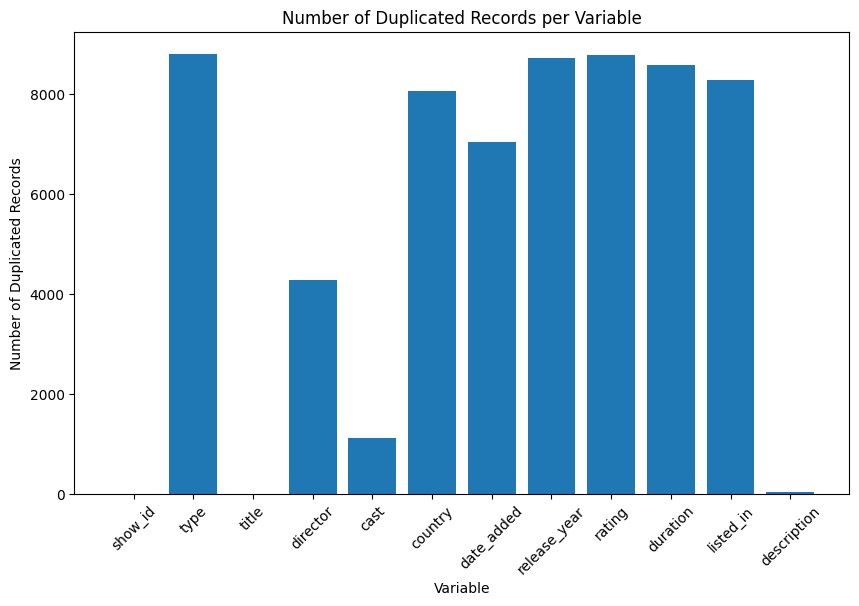

In [6]:
#data quality issue: variables with repeated data - Inspecting the dataframe visually

import pandas as pd
import matplotlib.pyplot as plt

def plot_duplicates(df):
    # Create a list to store the number of duplicated records per variable
    duplicates_per_variable = []

    # Iterate over each column in the DataFrame
    for column in df.columns:
        # Calculate the total number of duplicated records in the column
        total_duplicates = df.duplicated(subset=[column]).sum()
        duplicates_per_variable.append(total_duplicates)

    # Create a bar chart to display the count of duplicated records
    plt.figure(figsize=(10, 6))
    plt.bar(df.columns, duplicates_per_variable)
    plt.xlabel('Variable')
    plt.ylabel('Number of Duplicated Records')
    plt.title('Number of Duplicated Records per Variable')
    plt.xticks(rotation=45)
    plt.show()

plot_duplicates(xbox)
plot_duplicates(netflix)


In [7]:
# data quality issue: variables with repeated data: The idea is to find which variables have the greatest amount of repeated data to exclude these records if necessary. - Inspecting the dataframe programmatically

import pandas as pd

def show_duplicates(df):
    # Create a list of dictionaries to store the results
    results = []

    # Iterate over each column in the DataFrame
    for column in df.columns:
        # Calculate the total number of duplicate records in the column
        total_duplicates = df.duplicated(subset=[column]).sum()

        # Calculate the percentage of duplicate records in the column
        percentage_duplicates = (total_duplicates / len(df)) * 100

        # Add the results to the list as dictionaries
        results.append({
            'Variable': column,
            'Total Duplicates': total_duplicates,
            'Percentage Duplicates': percentage_duplicates
        })

    # Create a DataFrame from the list of dictionaries
    results_df = pd.DataFrame(results)

    return results_df

print(show_duplicates(xbox))
print("\n")
print(show_duplicates(netflix))



          Variable  Total Duplicates  Percentage Duplicates
0           gameid                 0               0.000000
1             name                 1               0.020807
2              web               989              20.578444
3        publisher              3551              73.886808
4        developer              2237              46.545984
5          release              3436              71.493966
6         platform              4798              99.833541
7            genre              4357              90.657511
8         hardware              4797              99.812734
9            notes              4773              99.313358
10          medium              4802              99.916771
11            size              2759              57.407407
12  completion est              4759              99.022056
13           links              4804              99.958385
14        features              4685              97.482314


        Variable  Total Duplicates  Pe

Issue and justification: data quality issue: variables with repeated data: The idea is to find which variables have the greatest amount of repeated data to exclude these records if necessary. This is because if, for example, a variable is found that must have unique values ​​with repeated values, it can hinder the analysis.


### Tidiness Issue 1:

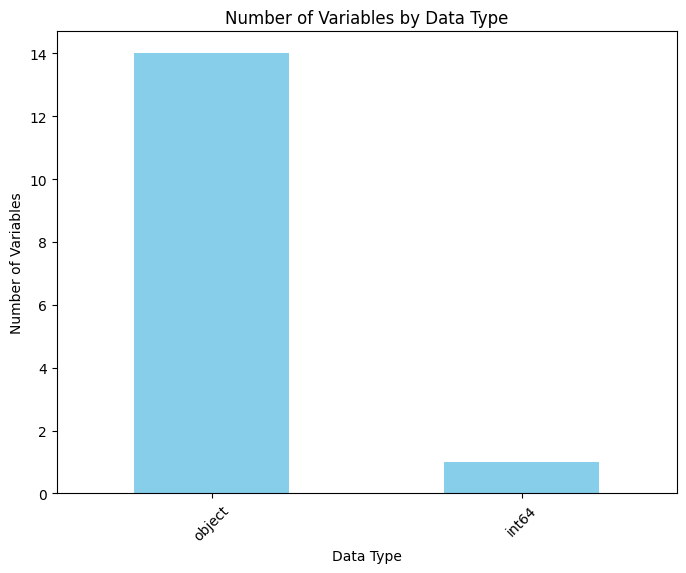

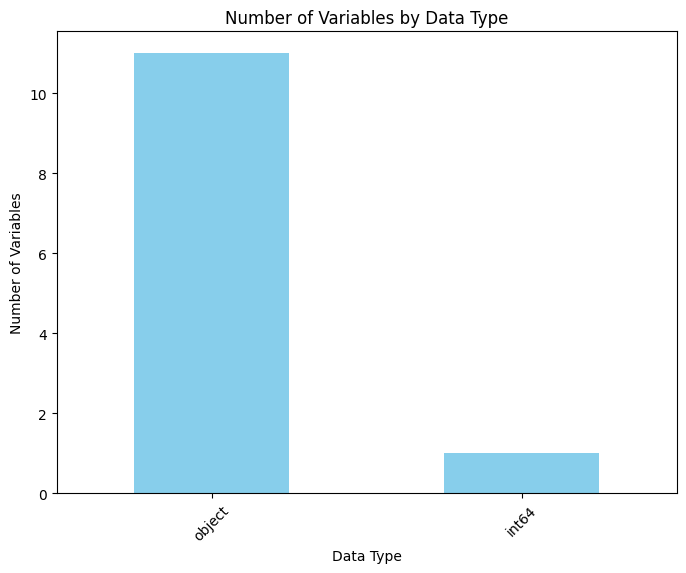

In [8]:
# Data tidiness issue: variables with incorrect data type - Inspecting the dataframe visually

import pandas as pd
import matplotlib.pyplot as plt

def plot_variable_types(df):
    # Get information about data types in the DataFrame
    variable_types = df.dtypes.value_counts()

    # Create a bar chart to display the number of variables per data type
    plt.figure(figsize=(8, 6))
    variable_types.plot(kind='bar', color='skyblue')
    plt.xlabel('Data Type')
    plt.ylabel('Number of Variables')
    plt.title('Number of Variables by Data Type')
    plt.xticks(rotation=45)
    plt.show()

plot_variable_types(xbox)
plot_variable_types(netflix)


In [9]:
# Data tidiness issue: variables with incorrect data type - Inspecting the dataframe programmatically

import pandas as pd

def data_types_variables(df):
    data_types = df.dtypes
    return data_types

print(data_types_variables(xbox))
print("\n")
print(data_types_variables(netflix))


gameid             int64
name              object
web               object
publisher         object
developer         object
release           object
platform          object
genre             object
hardware          object
notes             object
medium            object
size              object
completion est    object
links             object
features          object
dtype: object


show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


Issue and justification: Data tidiness issue: variables with incorrect data type: The idea is to find which variables have the wrong data type for the analysis and correct it if necessary. This is because in some cases the type of variable can affect the final analysis.

### Tidiness Issue 2: 

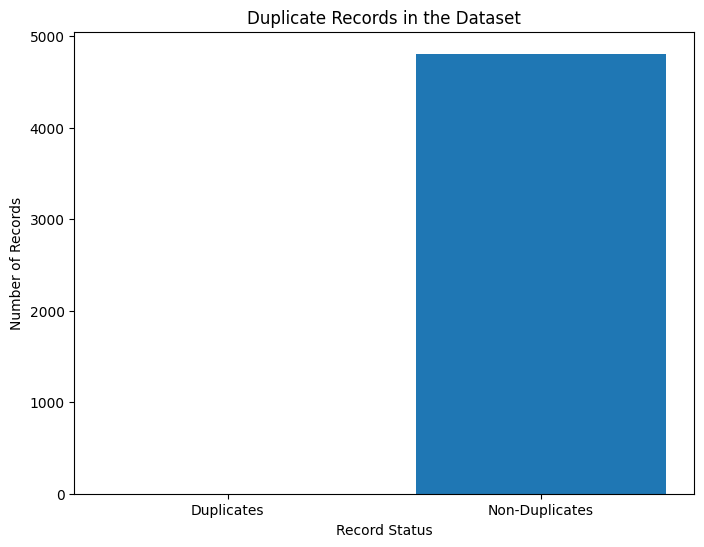

None


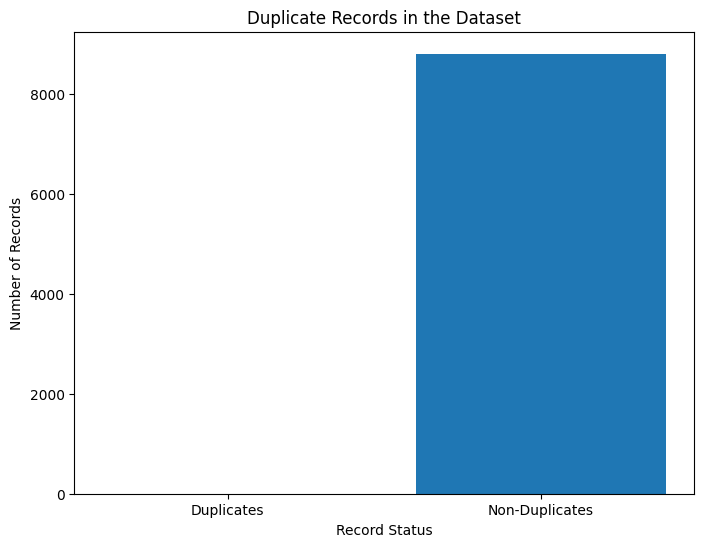

None


In [10]:
# tidiness issue - duplicate records - Inspecting the dataframe visually

import pandas as pd
import matplotlib.pyplot as plt

def plot_duplicate_records(dataframe):
    # Find duplicate records in the DataFrame
    duplicates = dataframe[dataframe.duplicated(keep=False)]

    # Count the number of duplicate records
    num_duplicates = len(duplicates)

    # Create a bar chart to display the number of duplicate and non-duplicate records
    plt.figure(figsize=(8, 6))
    plt.bar(['Duplicates', 'Non-Duplicates'], [num_duplicates, len(dataframe) - num_duplicates])
    plt.xlabel('Record Status')
    plt.ylabel('Number of Records')
    plt.title('Duplicate Records in the Dataset')
    plt.show()

print(plot_duplicate_records(xbox))
print(plot_duplicate_records(netflix))



In [11]:
# tidiness issue - duplicate records - Inspecting the dataframe programmatically

import pandas as pd

def count_duplicate_records(dataset):
    """
    This function takes a pandas DataFrame and returns the number of duplicate records.
    
    :param dataset: pandas DataFrame
    :return: Number of duplicate records
    """
    # We use the 'duplicated' method of pandas to identify duplicates
    duplicates = dataset[dataset.duplicated(keep='first')]
    
    # Get the number of duplicate records
    duplicate_count = len(duplicates)
    
    return duplicate_count

count_duplicate_records(xbox)
count_duplicate_records(netflix)


0

Issue and justification: tidiness issue - duplicate records: In this case the idea is to explore records that may be duplicated due to some registry error by evaluating all the columns. This is because an incorrect analysis can be generated and evaluating variable by variable is not enough since it may be okay for some data of a variable to be repeated, but it is bad when it is the entire record.

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [12]:
# storing copies of each dataset to evaluate, clean and/or correct the respective error without altering the original dataset - Make copies of the datasets to ensure the raw dataframes 
# are not impacted

xbox_1 = xbox.copy()
xbox_2 = xbox.copy()
xbox_3 = xbox.copy()
xbox_4 = xbox.copy()

netflix_1 = netflix.copy()
netflix_2 = netflix.copy()
netflix_3 = netflix.copy()
netflix_4 = netflix.copy()

### **Quality Issue 1: Null Values

In [13]:
# eliminate null records of specific variables of a dataset - Apply the cleaning strategy

import pandas as pd

def remove_null_records(dataset, columns):
    """
    Removes records containing null values in one or more columns of the dataset.

    Args:
        dataset (pd.DataFrame): The DataFrame containing the data.
        columns (list): A list of column names where null values will be checked.

    Returns:
        pd.DataFrame: A new DataFrame with records that do not contain null values in the specified columns.
    """
    # Use the dropna method to remove records with null values in the specified columns
    dataset_without_nulls = dataset.dropna(subset=columns)

    return dataset_without_nulls

# Assuming that 'xbox_copy' is your DataFrame and you want to remove null records in the 'web', 'publisher', and 'developer' columns
columns_xbox = ['web', 'publisher', 'developer']
xbox_1 = remove_null_records(xbox_1, columns_xbox)

# Assuming that 'netflix_copy' is your DataFrame and you want to remove null records in the 'director', 'cast', and 'country' columns
columns_netflix = ['director', 'country']
netflix_1 = remove_null_records(netflix_1, columns_netflix)




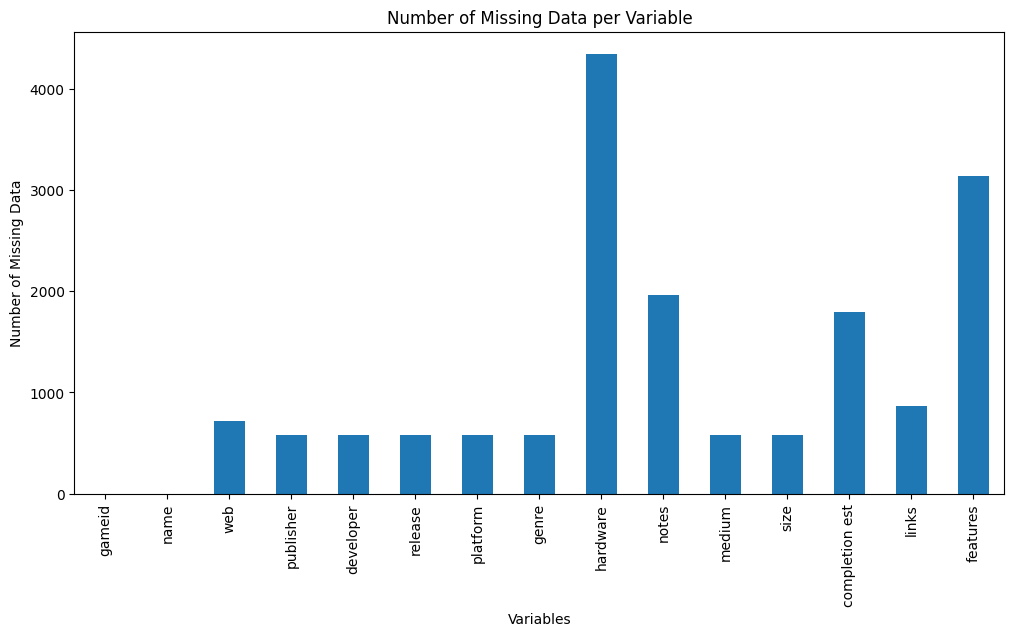

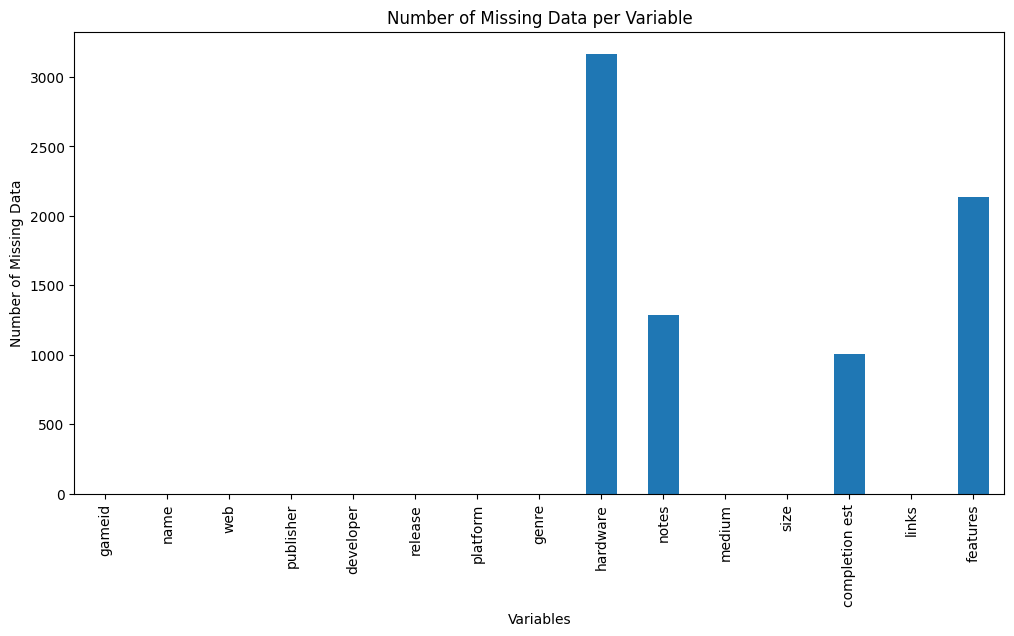

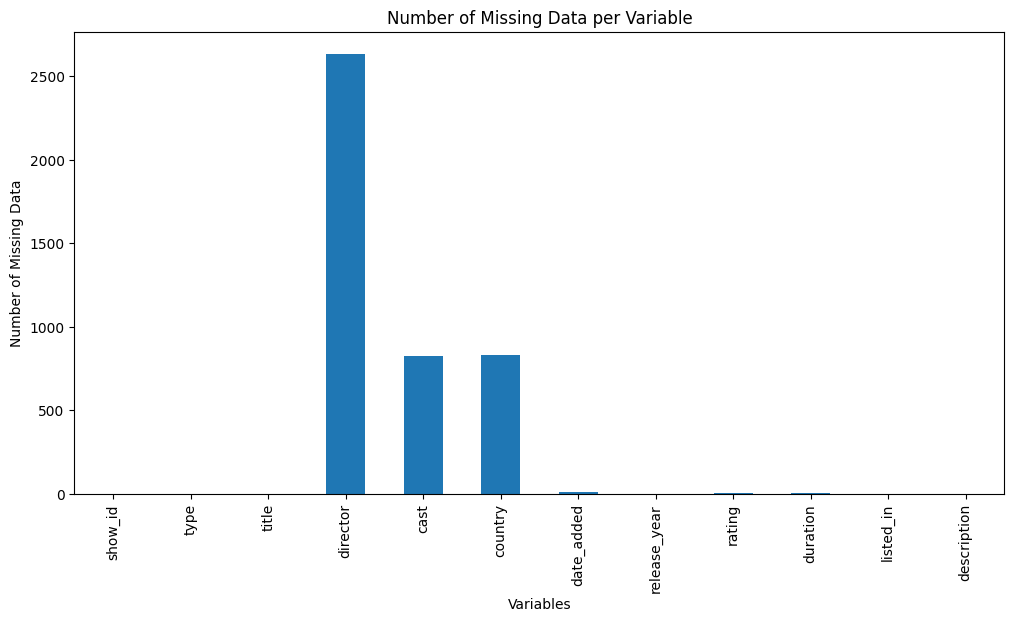

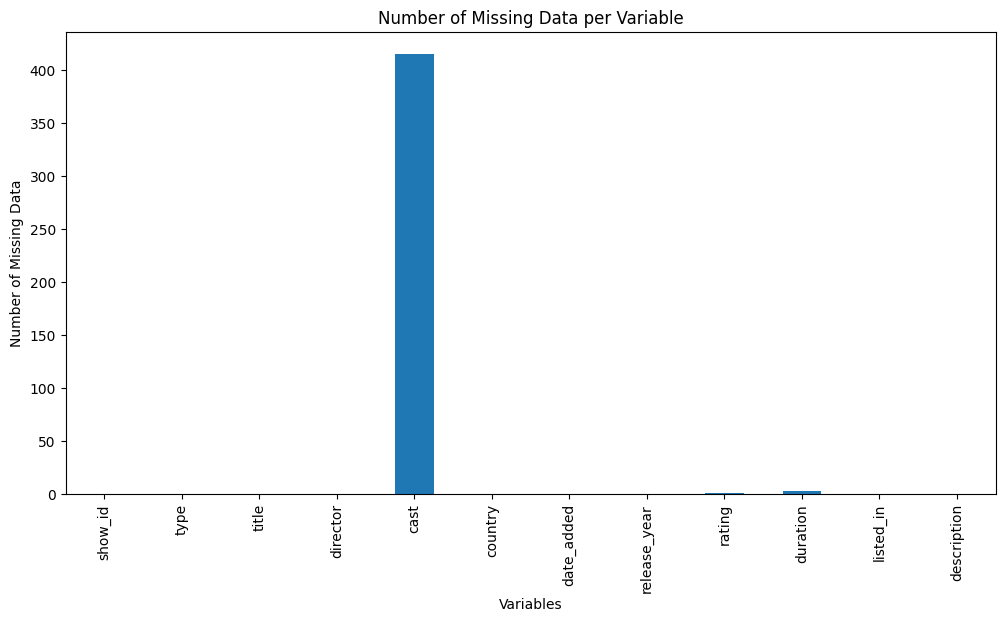

                Nulls  Null Percentage
gameid              0         0.000000
name                0         0.000000
web               714        14.856429
publisher         583        12.130670
developer         582        12.109863
release           580        12.068248
platform          580        12.068248
genre             583        12.130670
hardware         4345        90.407824
notes            1966        40.907199
medium            580        12.068248
size              581        12.089055
completion est   1791        37.265918
links             862        17.935913
features         3140        65.334998


                Nulls  Null Percentage
gameid              0         0.000000
name                0         0.000000
web                 0         0.000000
publisher           0         0.000000
developer           0         0.000000
release             0         0.000000
platform            0         0.000000
genre               1         0.028035
hardware         3167  

In [14]:
# eliminate null records of specific variables of a dataset - Validate the cleaning was successful

plot_missing_data(xbox)
plot_missing_data(xbox_1)

plot_missing_data(netflix)
plot_missing_data(netflix_1)

print(null_data_summary(xbox))
print("\n")
print(null_data_summary(xbox_1))
print("\n")
print(null_data_summary(netflix))
print("\n")
print(null_data_summary(netflix_1))


Justification: In this case, by creating a function, when evaluating which variables have null data, they can be eliminated by specifying a dataset and its variables in the function.

### **Quality Issue 2: Repeated Values

In [15]:
# eliminate duplicate records of specific variables of a dataset - Apply the cleaning strategy

import pandas as pd

# Let's assume you have a DataFrame named "netflix_2" already defined.

def remove_duplicate_records(dataset, columns):
    """
    Removes duplicate records from a dataset based on the specified columns.
    
    Args:
    dataset (pd.DataFrame): The DataFrame containing the data.
    columns (list): List of column names to identify duplicates.

    Returns:
    pd.DataFrame: DataFrame with duplicate records removed.
    """
    dataset_without_duplicates = dataset.drop_duplicates(subset=columns, keep='first')
    return dataset_without_duplicates

# Let's assume you have a DataFrame named "netflix_2" and you want to remove duplicates in the 'publisher', 'developer', and 'release' columns.
columns_xbox_2 = ['publisher', 'developer', 'release']
xbox_2 = remove_duplicate_records(xbox_2, columns_xbox_2)





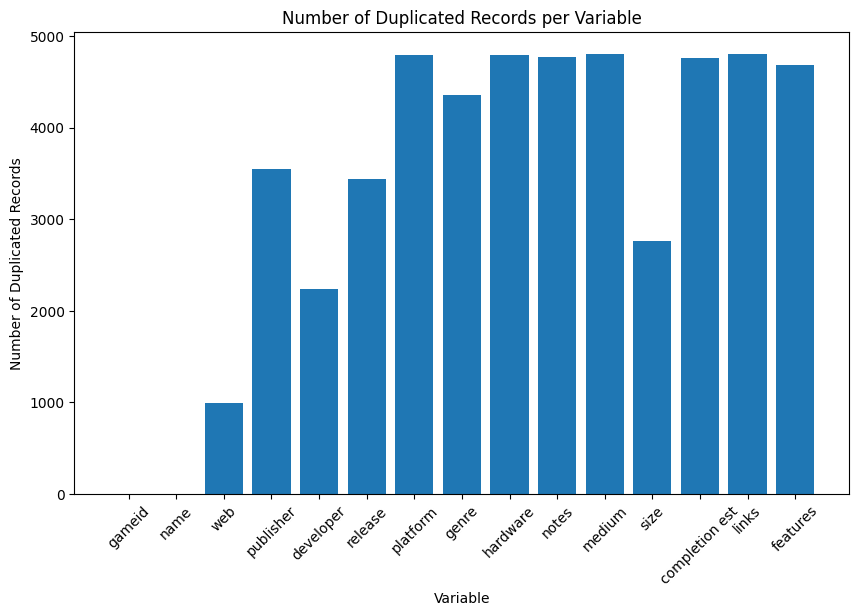

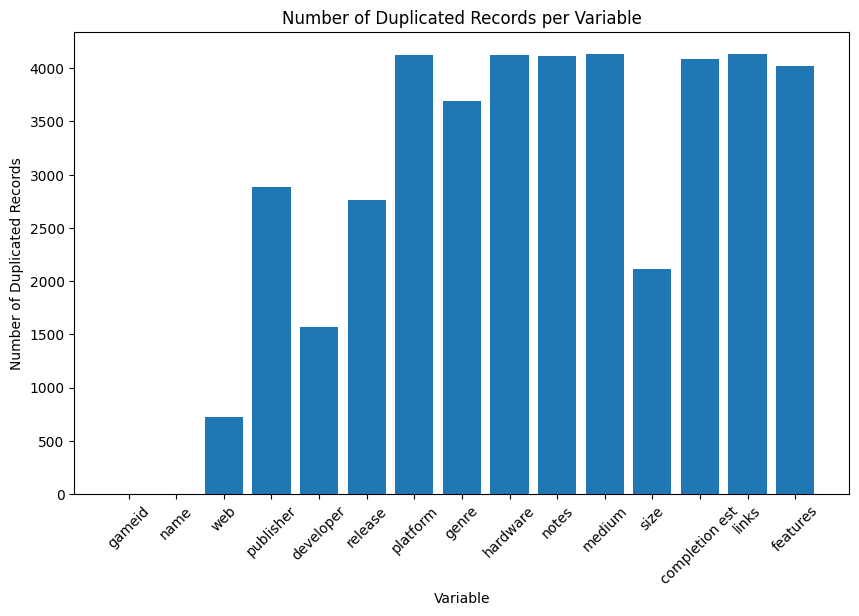

          Variable  Total Duplicates  Percentage Duplicates
0           gameid                 0               0.000000
1             name                 1               0.020807
2              web               989              20.578444
3        publisher              3551              73.886808
4        developer              2237              46.545984
5          release              3436              71.493966
6         platform              4798              99.833541
7            genre              4357              90.657511
8         hardware              4797              99.812734
9            notes              4773              99.313358
10          medium              4802              99.916771
11            size              2759              57.407407
12  completion est              4759              99.022056
13           links              4804              99.958385
14        features              4685              97.482314


          Variable  Total Duplicates  

In [16]:
# eliminate duplicate records of specific variables of a dataset - Validate the cleaning was successful

plot_duplicates(xbox)
print("\n")
plot_duplicates(xbox_2)

print(show_duplicates(xbox))
print("\n")
print(show_duplicates(xbox_2))



Justification: In this case, by creating a function, when evaluating which variables have repeated data, they can be eliminated by specifying a dataset and its variables in the function.

### **Tidiness Issue 1: Incorrect Datatypes

In [17]:
# correcting variable types - Apply the cleaning strategy

def change_variable_type(dataset, column, new_type):
    """
    Changes the variable type of a column in a dataset.

    Args:
        dataset (pd.DataFrame): The DataFrame containing the data.
        column (str): The name of the column to be modified.
        new_type (type): The new variable type (e.g., int, float, str, etc.).

    Returns:
        pd.DataFrame: The DataFrame with the modified column.
    """
    try:
        dataset[column] = dataset[column].astype(new_type)
    except ValueError as e:
        print(f"Error: {e}")
    return dataset


In this case all the variables have the correct data type, which is why it is not necessary to change the types, however I write the function that allows changing the variable type

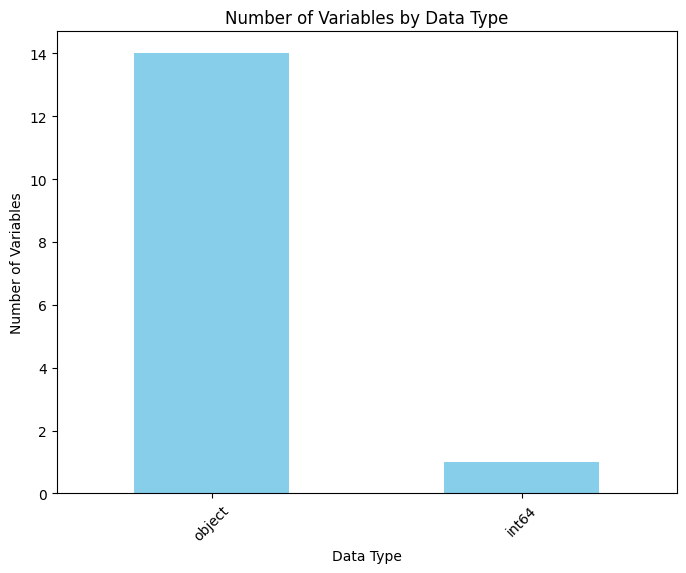

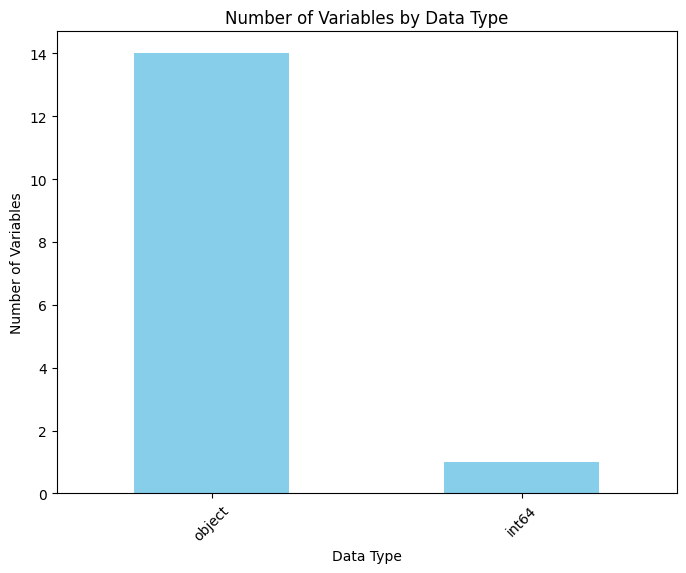

gameid             int64
name              object
web               object
publisher         object
developer         object
release           object
platform          object
genre             object
hardware          object
notes             object
medium            object
size              object
completion est    object
links             object
features          object
dtype: object
gameid             int64
name              object
web               object
publisher         object
developer         object
release           object
platform          object
genre             object
hardware          object
notes             object
medium            object
size              object
completion est    object
links             object
features          object
dtype: object


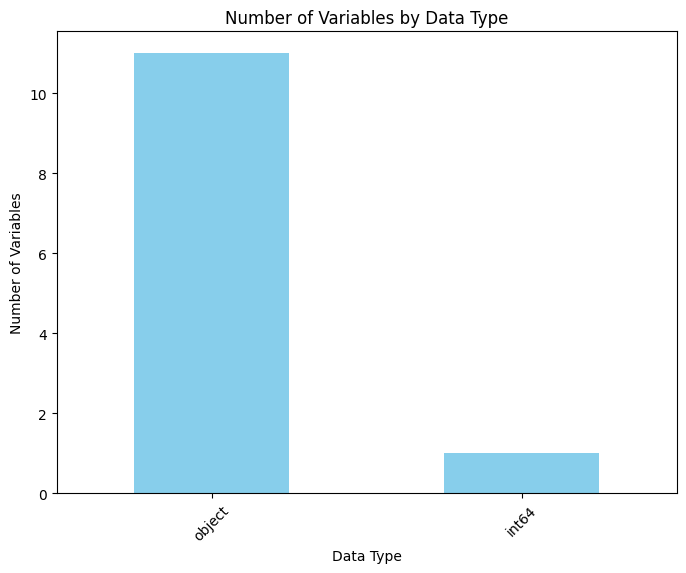

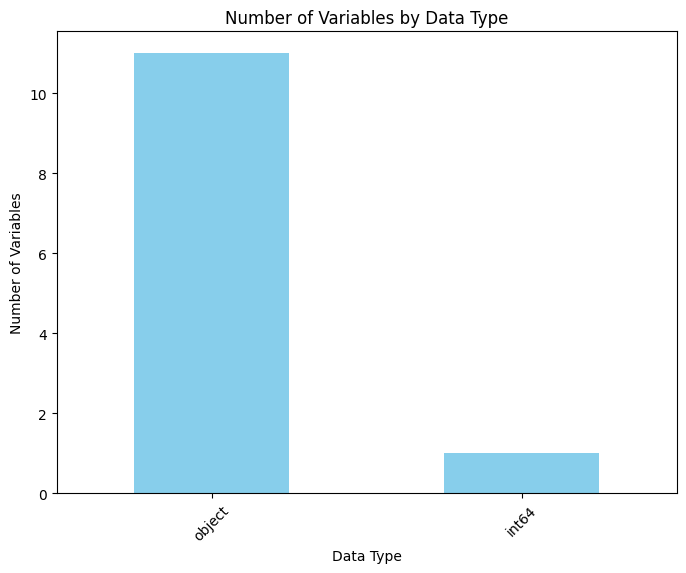

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


In [18]:
# correcting variable types - Validate the cleaning was successful

plot_variable_types(xbox)
plot_variable_types(xbox_3)

print(data_types_variables(xbox))
print(data_types_variables(xbox_3))

plot_variable_types(netflix)
plot_variable_types(netflix_3)

print(data_types_variables(netflix))
print(data_types_variables(netflix_3))

Justification: In this case, with the creation of a function it is achieved that by evaluating which variables have incorrect data types, the specific variable can be identified and corrected.

### **Tidiness Issue 2: Repeated registers

In [19]:
# Repeated registers - Apply the cleaning strategy

def remove_duplicate_records(dataset):
    """
    Removes duplicate records in a dataset considering all variables.
    
    :param dataset: pandas DataFrame representing the dataset.
    :return: DataFrame without duplicate records.
    """
    dataset_without_duplicates = dataset.drop_duplicates()
    return dataset_without_duplicates

In this case it was not necessary to eliminate duplicate records because there are none, however I write the code to eliminate them

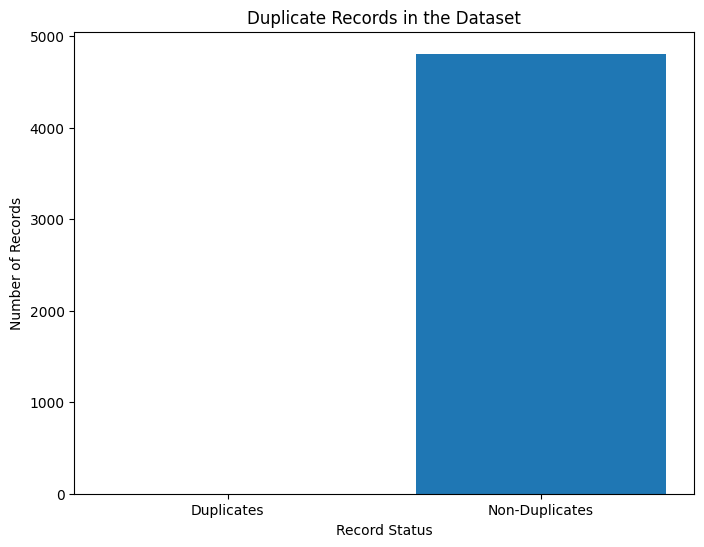

None


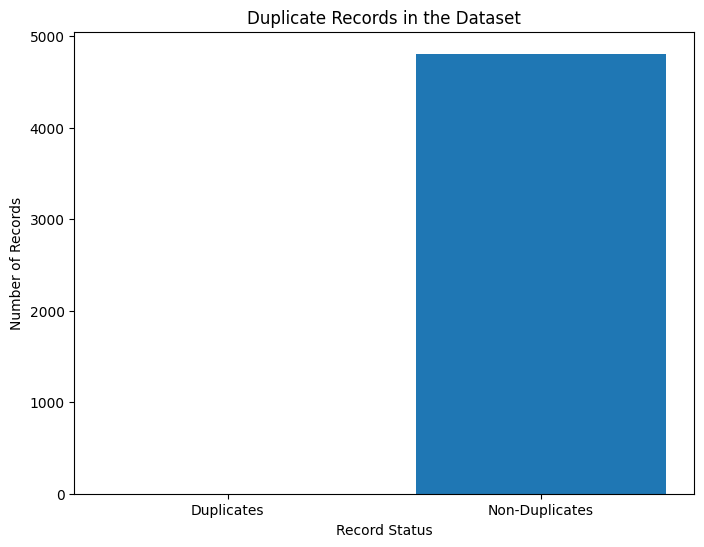

None


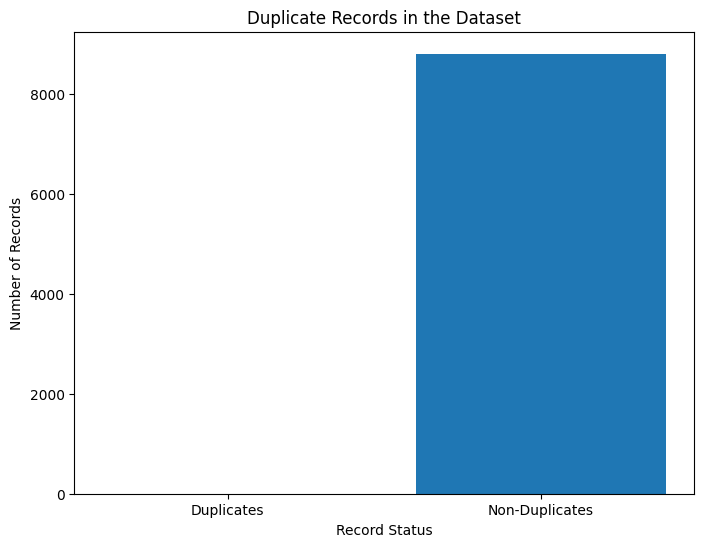

None


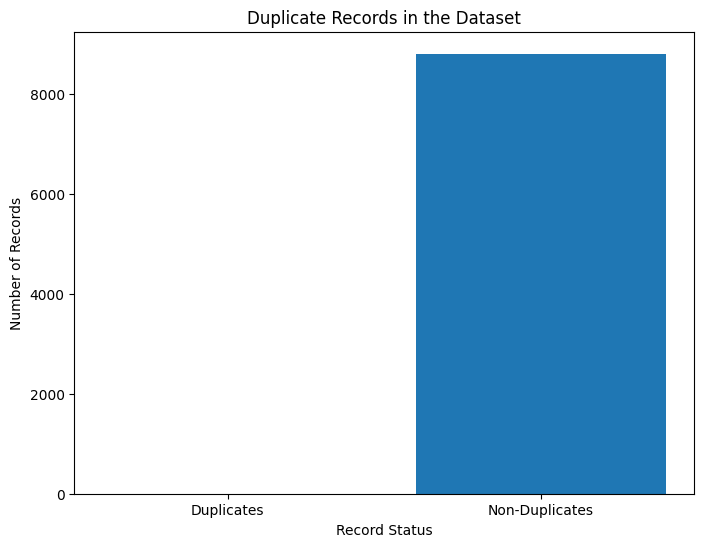

None
0
0
0
0


In [20]:
# Repeated registers - Validate the cleaning was successful

print(plot_duplicate_records(xbox))
print(plot_duplicate_records(xbox_4))

print(plot_duplicate_records(netflix))
print(plot_duplicate_records(netflix_4))

print(count_duplicate_records(xbox))
print(count_duplicate_records(xbox_4))

print(count_duplicate_records(netflix))
print(count_duplicate_records(netflix_4))


Justification: In this case, with the creation of a function, when evaluating the complete dataset, it is possible to identify if there are identical records, since due to some error they can be included in an incorrect analysis and taking into account that when evaluating a specific variable it can be correct that it has repeated data

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [21]:
#selection of relevant variables for the analysis - Remove unnecessary variables and combine datasets

xbox_final = xbox_1[['gameid', 'web', 'publisher', 'developer']]
netflix_final = netflix_1[['show_id', 'director', 'country']]


## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [22]:
# Showing of historical copies of xbox and netflix datasets - saving data

# XBOX

print(xbox.head()) #base
print(xbox_1.head()) #cleaned
print(xbox_final.head()) #cleaned and filtered

# NETFLIX

print(netflix.head()) #base
print(netflix_1.head()) #cleaned
print(netflix.head()) #cleaned and filtered


   gameid                                          name  \
0    5530                                             Q   
1    5819  Q*bert REBOOTED: The XBOX One @!#?@! Edition   
2    6951                                    Q.U.B.E. 2   
3    5561                       Q.U.B.E. Director's Cut   
4    9781                                         Quake   

                                       web            publisher  \
0  http://liica.co.jp/contents/q/jp/x.html                liica   
1                                      NaN                  GPC   
2      https://www.toxicgames.co.uk/qube2/  Trapped Nerve Games   
3                    http://qube-game.com/         GRIP Digital   
4                                      NaN   Bethesda Softworks   

                                      developer           release  \
0                              liica, OrangeBox      26 June 2015   
1                              LOOT Interactive  12 February 2016   
2                                  

## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

*Research question:* 1. For Xbox One games, who are the websites and publishers with the most games published and which developers have made the most games?

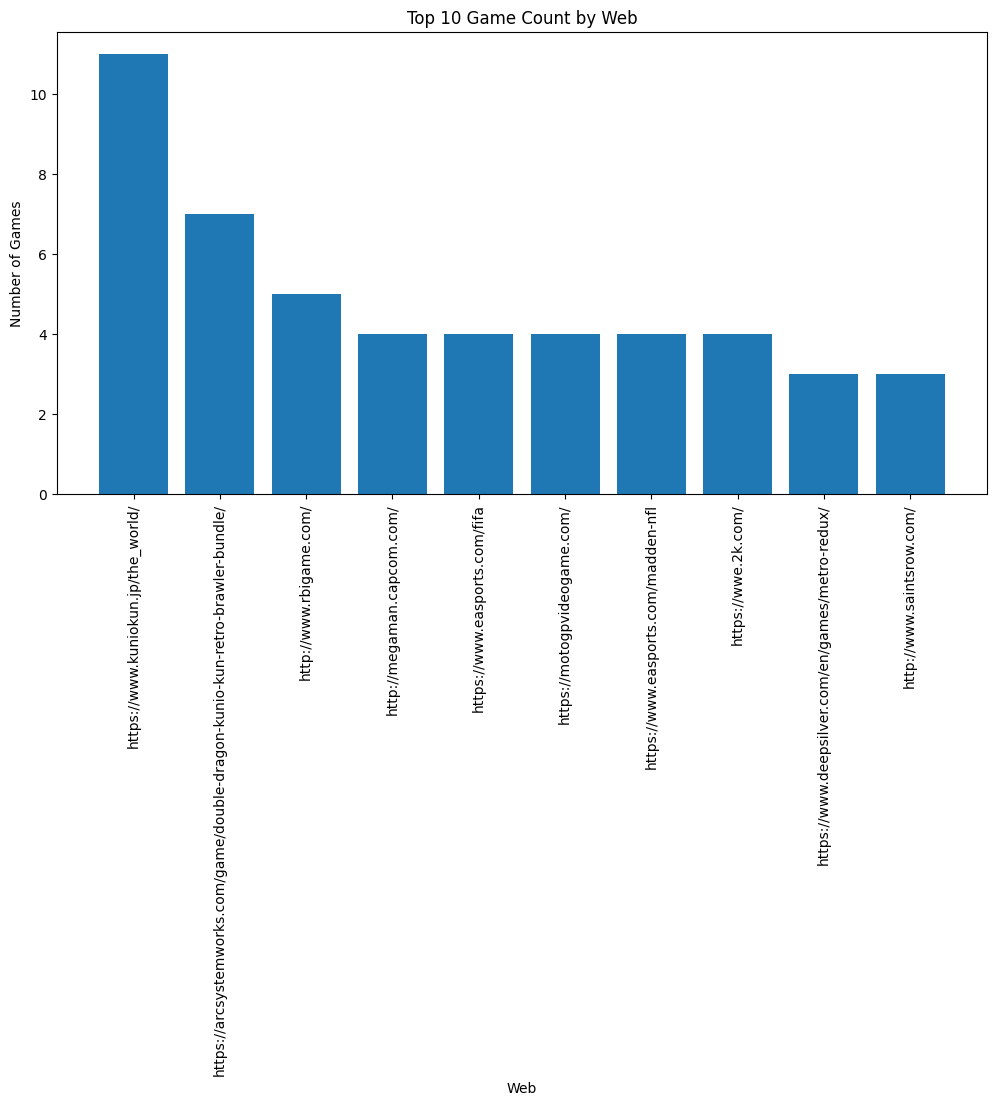

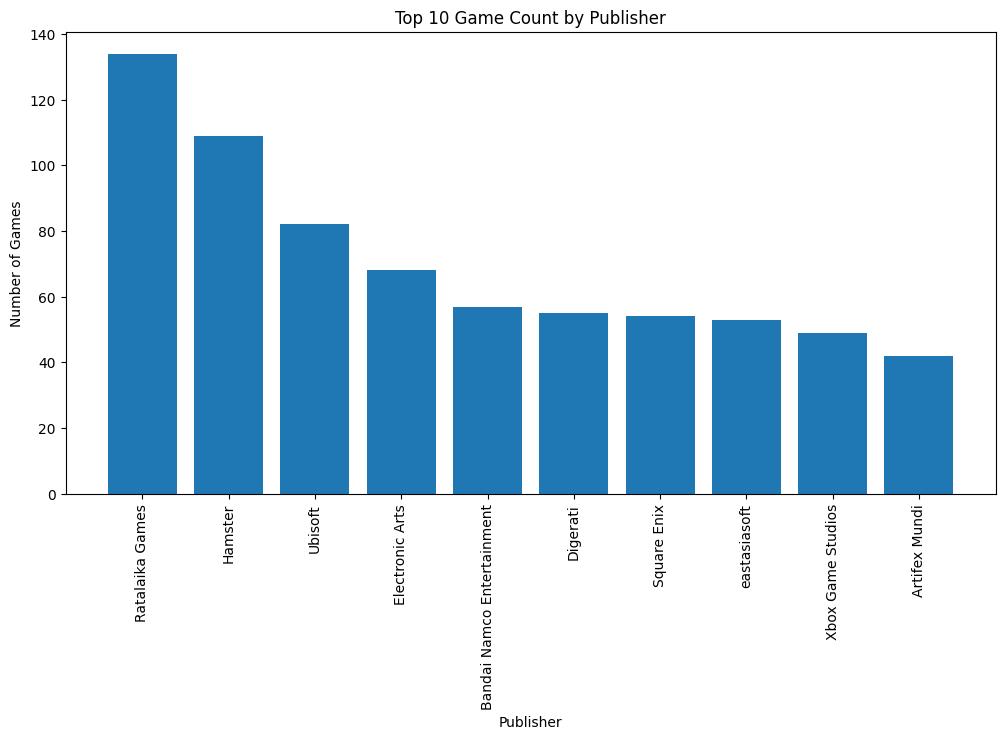

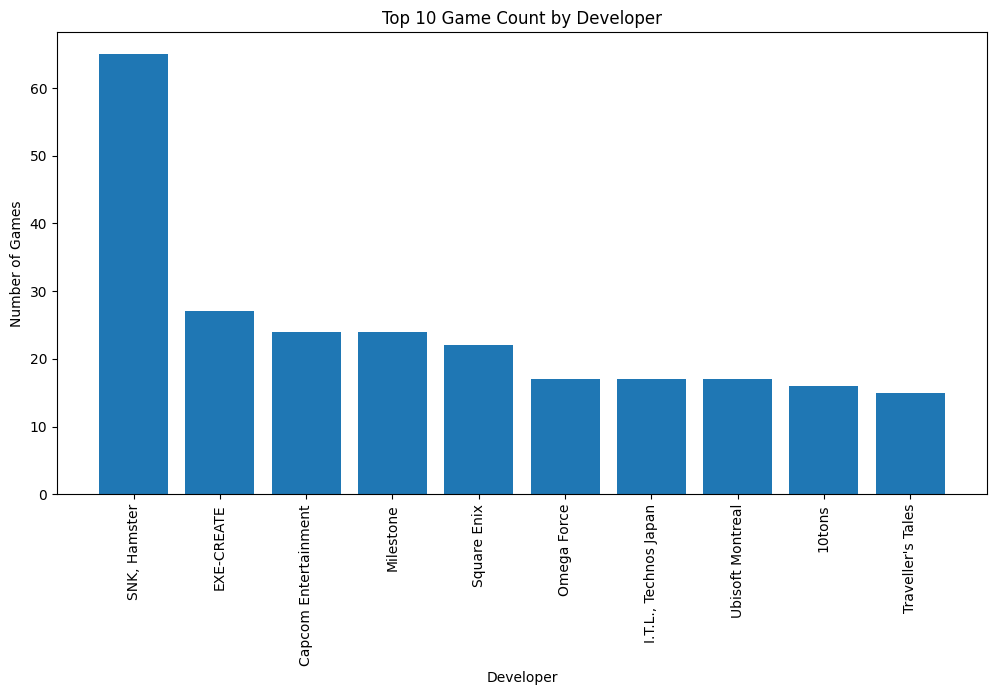

In [23]:
#Visual 1 - FILL IN

import pandas as pd
import matplotlib.pyplot as plt


# Perform a differentiated count of gameid and group it by web, publisher, and developer
count_by_web = xbox_final['web'].value_counts().nlargest(10)
count_by_publisher = xbox_final['publisher'].value_counts().nlargest(10)
count_by_developer = xbox_final['developer'].value_counts().nlargest(10)

# Generate individual visualizations
plt.figure(figsize=(12, 6))

# Bar chart for the count by web
plt.bar(count_by_web.index, count_by_web.values)
plt.title('Top 10 Game Count by Web')
plt.xlabel('Web')
plt.ylabel('Number of Games')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()

# Bar chart for the count by publisher
plt.figure(figsize=(12, 6))
plt.bar(count_by_publisher.index, count_by_publisher.values)
plt.title('Top 10 Game Count by Publisher')
plt.xlabel('Publisher')
plt.ylabel('Number of Games')
plt.xticks(rotation=90)
plt.show()

# Bar chart for the count by developer
plt.figure(figsize=(12, 6))
plt.bar(count_by_developer.index, count_by_developer.values)
plt.title('Top 10 Game Count by Developer')
plt.xlabel('Developer')
plt.ylabel('Number of Games')
plt.xticks(rotation=90)
plt.show()



*Answer to research question:* 

In the previous graphs you can see the answer to the questions with the top 10 websites, publishers and developers visually.

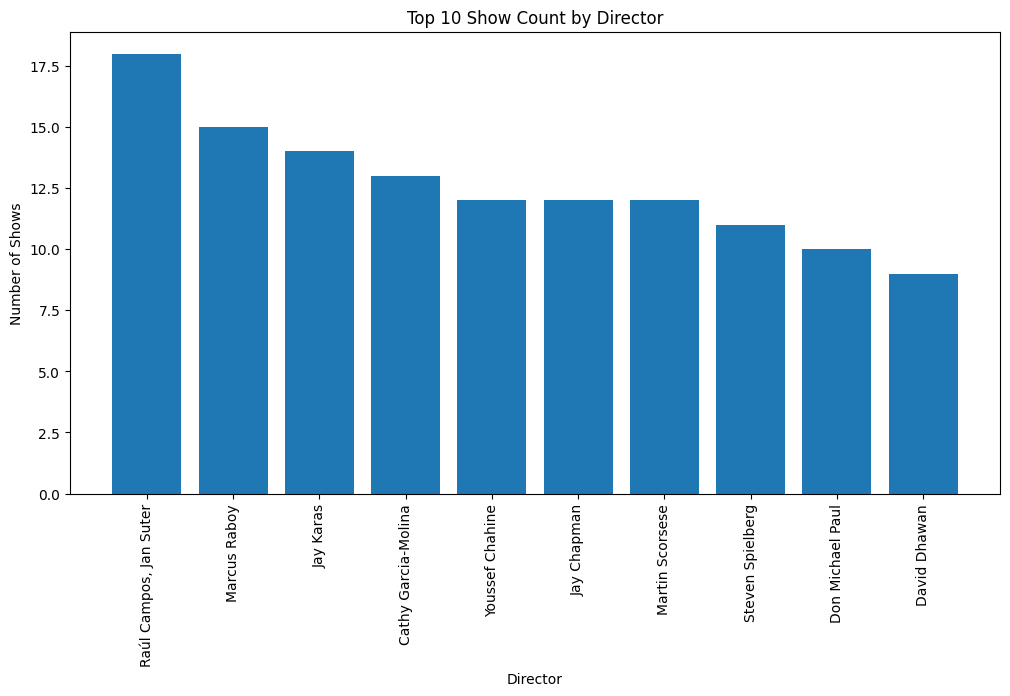

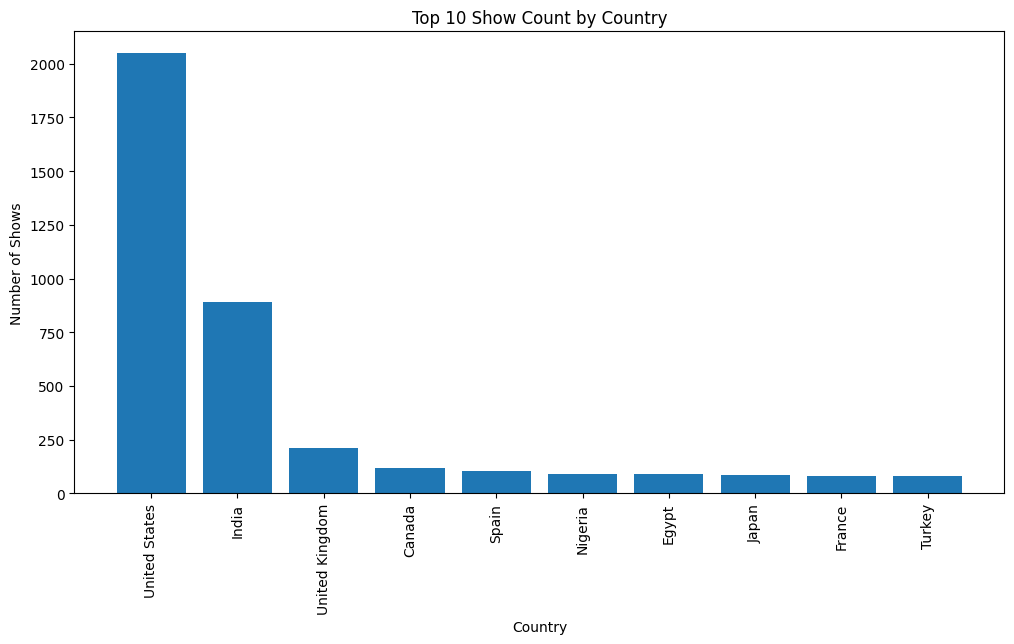

In [24]:
#Visual 2 - 2. Of the series on Netflix, which are the countries that have produced the most shows and who are the directors with the largest number of series produced on Netflix?

import pandas as pd
import matplotlib.pyplot as plt


# Perform a differentiated count of show_id and group it by director and country
count_by_director = netflix_final['director'].value_counts().nlargest(10)
count_by_country = netflix_final['country'].value_counts().nlargest(10)

# Generate individual visualizations
plt.figure(figsize=(12, 6))

# Bar chart for the count by director
plt.bar(count_by_director.index, count_by_director.values)
plt.title('Top 10 Show Count by Director')
plt.xlabel('Director')
plt.ylabel('Number of Shows')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()

# Bar chart for the count by country
plt.figure(figsize=(12, 6))
plt.bar(count_by_country.index, count_by_country.values)
plt.title('Top 10 Show Count by Country')
plt.xlabel('Country')
plt.ylabel('Number of Shows')
plt.xticks(rotation=90)
plt.show()


*Answer to research question:* In the previous graphs you can see the answer to the questions with the top 10 directors and countries visually.

### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

Throughout the code we wanted to mitigate classic quality and tidiness errors, we chose to be able to observe variables with null data, variables with repeated data, variables with incorrect data type and repeated records in the dataset. The idea was to be able to evaluate the dataset of games published for Xbox and the series available on Netflix. After this analysis, depending on the conditions of the bases, it was necessary to fix them, which is why the code was generated to correct each error.

 And due to the quality of the data, in most cases it was not necessary, and for the research question it was only necessary to correct the issue of null data, which for the Xbox dataset were the web variables. publisher and developer.

For this reason, these corrected datasets without these specific null variables were taken as input. Subsequently, due to the research questions, the variables of interest were filtered, leaving all the other previous datasets stored in the environment. The research questions were: 1. What are the websites, publishers and developers with the largest number of Xbox One games? And 2. Who are the directors with the most movies on Netflix and what country is the one with the most movies on Netflix?

This is observable and it was possible to respond thanks to the cleaning that was done of the data in a precise way and the graphs fed with this information.

*Answer:* FILL IN